In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPooling2D,Flatten
import numpy as np 

In [8]:
import tensorflow.keras as keras

train=keras.utils.image_dataset_from_directory(
    directory='deep learning dataset/animals',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 1000 files belonging to 2 classes.


In [ ]:
#checking the shape
for images, labels in train.take(1):
    print(images.shape)
    print(labels.shape)

(32, 256, 256, 3)
(32,)


In [ ]:
#preprocessing 
def process(image,label):
    image = image/255
    return image,label
train=train.map(process)
#transferlearing


In [16]:
model=([
    Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1,activation='sigmoid')

])

C:\Users\win11\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3))),
model.add(MaxPooling2D((2,2))),
model.add(Conv2D(64,(3,3),activation='relu')),
model.add(MaxPooling2D((2,2))),
model.add(Conv2D(128,(3,3),activation='relu')),
model.add(MaxPooling2D((2,2))),
model.add(Conv2D(128,(3,3),activation='relu')),
model.add(MaxPooling2D((2,2))),
model.add(Flatten()),
model.add(Dense(512,activation='relu')),
model.add(Dense(1,activation='sigmoid'))

C:\Users\win11\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
evl=model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
x=np.array(images)
y=np.array(labels)

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
print(x_train.shape)
y_train.shape
x_train.shape
y_test.shape

(25, 256, 256, 3)


(7,)

In [33]:
history=model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.8800 - loss: 0.2084 - val_accuracy: 0.4286 - val_loss: 2.8468
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6800 - loss: 0.8714 - val_accuracy: 0.5714 - val_loss: 0.5627
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.7600 - loss: 0.4407 - val_accuracy: 0.4286 - val_loss: 2.0772
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7200 - loss: 0.4741 - val_accuracy: 1.0000 - val_loss: 0.1211
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0381 - val_accuracy: 1.0000 - val_loss: 0.0797
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0235 - val_accuracy: 0.5714 - val_loss: 1.1854
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.9200 - loss: 0.1666 - val_accuracy: 1.0000 - val_loss: 0.0780
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.0225 - val_accuracy: 0.8571 - val_loss: 0.2330
Epoch 9/20
1/1 ━

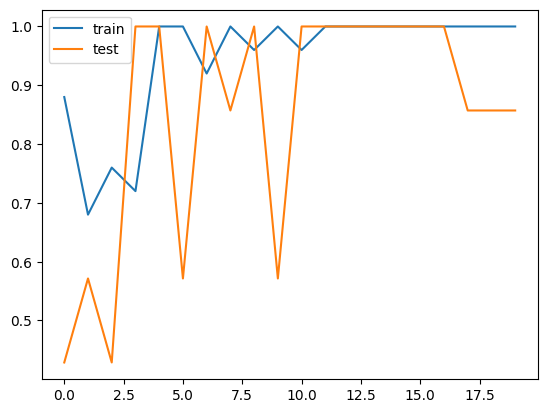

In [35]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='test')
plt.legend()
plt.show()

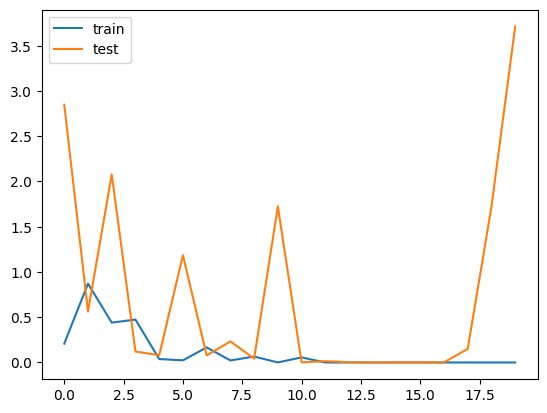

In [36]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

In [ ]:
# ==============================
# 🎯 Make Predictions
# ==============================
import tensorflow as tf
from tensorflow.keras.preprocessing import image

img_path = r"E:\kaggle dataset\deep learning dataset\cat.jpg"  # Change image path
img = image.load_img(img_path, target_size=(img_height, img_width))
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print("Predicted emotion:", class_names[np.argmax(score)])
print("Confidence: {:.2f}%".format(100 * np.max(score)))